✅ Loading model from: federated_model.h5
✅ Loading test dataset from: AlzheimerDataset/test
Found 1283 files belonging to 4 classes.
✅ Model and data loaded successfully.
🧪 Running predictions on the test set...
✅ Predictions complete.

📊 Overall Test Accuracy: 0.8558

📑 Classification Report:

              precision    recall  f1-score   support

        Mild       0.91      0.91      0.91       180
    Moderate       1.00      1.00      1.00        13
          No       0.82      0.95      0.88       642
   Very Mild       0.90      0.69      0.78       448

    accuracy                           0.86      1283
   macro avg       0.91      0.89      0.89      1283
weighted avg       0.86      0.86      0.85      1283

🎨 Generating confusion matrix plot...


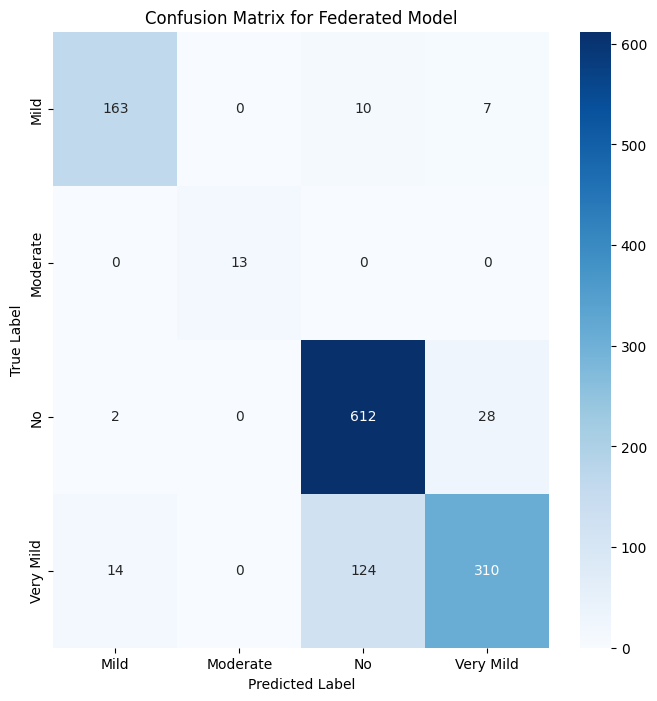

✅ Evaluation finished.


In [2]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# ============================================================
# 1. Setup: Load Model and Test Data
# ============================================================
MODEL_PATH = "federated_model.h5"
TEST_DATA_PATH = "AlzheimerDataset/test"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Define the class names in the correct order
CLASS_NAMES = ["Mild", "Moderate", "No", "Very Mild"]

print(f"✅ Loading model from: {MODEL_PATH}")
# Load the trained federated model
model = load_model(MODEL_PATH)

print(f"✅ Loading test dataset from: {TEST_DATA_PATH}")
# Load the entire, unpartitioned test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_PATH,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False  # Important: Do not shuffle for evaluation
)

# Normalize the test dataset in the same way as training data
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Model and data loaded successfully.")

# ============================================================
# 2. Make Predictions on the Entire Test Set
# ============================================================
print("🧪 Running predictions on the test set...")

y_true = []
y_pred = []

# Iterate over the test dataset to get true labels and predictions
for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

print("✅ Predictions complete.")

# ============================================================
# 3. Evaluate and Print Performance Metrics
# ============================================================
# Calculate overall accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n📊 Overall Test Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("\n📑 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# ============================================================
# 4. Plot the Confusion Matrix
# ============================================================
print("🎨 Generating confusion matrix plot...")

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title("Confusion Matrix for Federated Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("✅ Evaluation finished.")